## Ядерный PCA
Наиболее распространённые ядра:
* Полиноминальное ядро <br/>
$ k(x^{(i)},x^{(j)}) = (x^{(i)^T}x^{(j)}+\theta)^P$ <br/>
Здесь $\theta$ - это порог и $P$ - степень, которые должны быть определены пользователем
* Гиперболическая тангенсная функция (сигмоида) <br/>
$ k(x^{(i)},x^{(j)}) = tanh(\eta x^{(i)^T} x^{(j)} + \theta) $
* Радиальная базисная функцция (РБФ, radial basis function, RBF), или гауссово ядро <br/>
$ k(x^{(i)},x^{(j)}) = exp(-\frac{||x^{(i)} - x^{(j)}||^2}{2\sigma^2}) $ <br/>
Она также записывается следующим образом <br/>
$ k(x^{(i)},x^{(j)}) = exp(-\gamma||x^{(i)} - x^{(j)}||^2) $

<br/><br/>
Для реализации PCA с РБФ в качестве ядра нужно выполнить следующие шаги:
1. Вычислить матрицу ядра (матрицу подобия) $k$ <br/>
$ k(x^{(i)},x^{(j)}) = exp(-\gamma||x^{(i)} - x^{(j)}||^2) $ <br/>
Выполнить это для каждой пары образцов <br/>
$ K =
\begin{bmatrix}
k(x^{(1)},x^{(1)}) & k(x^{(1)},x^{(2)}) & ... & k(x^{(1)},x^{(n)}) \\
k(x^{(2)},x^{(1)}) & k(x^{(2)},x^{(2)}) & ... & k(x^{(2)},x^{(n)}) \\
... & ... & & ... \\
k(x^{(n)},x^{(1)}) & k(x^{(n)},x^{(2)}) & ... & k(x^{(n)},x^{(n)})
\end{bmatrix}
$
2. Центрировать матрицу ядра k, используя следующее равенство <br/>
$ K' = K - 1_nK - K1_n + 1_nK1_n $ <br/>
где $ 1_n $ - это $n \times n$ матрица (такой же размерности как матрица ядра), где все значения равны $\frac{1}{n}$
3. Взять верхние k собственных векторов центрированной матрицы ядра, 
основываясь на соответсвующих им собственных значениях,
которые ранжированы по убыванию длины. В отличии от стандартного PCA,
собственные векторы являются не осями главных компонент, а спроецированными на эти оси образцами.

In [16]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import PCA

from matplotlib import pylab as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [28]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    Kernel PCA with RBF
    
    Params
    ------------
    X: {numpy ndarray}, shape - [n_samples, n_features]
    gamma: float - RBF coefficient
    n_components: number of returning components
    
    Return
    ------------
    X_pc {numpy ndarray}, shape - [n_samples, k_features]
    Projection of X
    
    lambdas: list of eigen vals
    """
    # step 1
    # calculate pair euclidean distance
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert to square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Calculate kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # step 2
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # step 3
    eigvals, eigvecs = eigh(K)
    
    alphas = np.column_stack((eigvecs[:, -i]
                              for i in range(1, n_components + 1)))
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]
    
    return alphas, lambdas

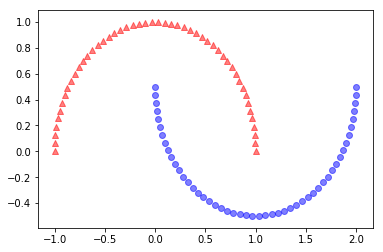

In [8]:
X, y = make_moons(n_samples=100, random_state=11)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=.5)
plt.show()

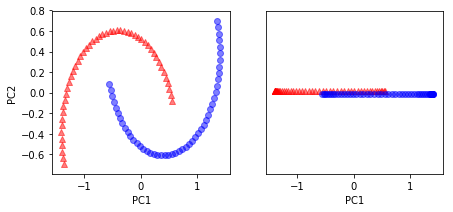

In [14]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1)) + .02,
              color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1)) - .02,
              color='blue', marker='o', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

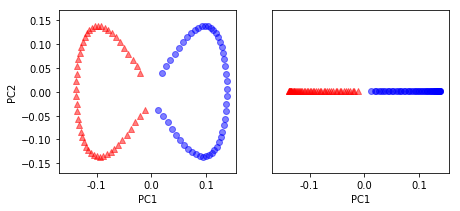

In [15]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1)) + .002,
              color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1)) - .002,
              color='blue', marker='o', alpha=.5);
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

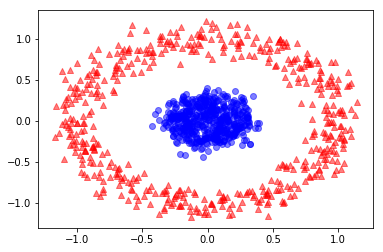

In [17]:
X, y = make_circles(n_samples=1000,
                    random_state=11,
                    noise=.1,
                    factor=.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=.5)
plt.show()

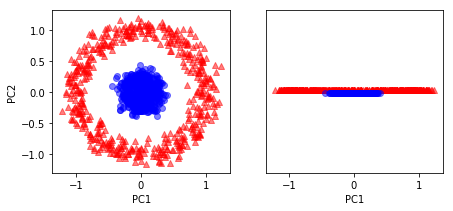

In [19]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1)) + .02,
              color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1)) - .02,
              color='blue', marker='o', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

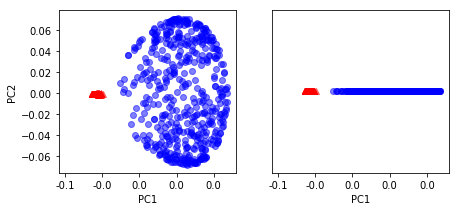

In [27]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1)) + .002,
              color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1)) - .002,
              color='blue', marker='o', alpha=.5);
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [29]:
X, y = make_moons(n_samples=100, random_state=11)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [31]:
x_new = X[25]
x_new

array([1.98155916, 0.30884137])

In [32]:
x_proj = alphas[25]
x_proj

array([0.04213031])

In [35]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row) ** 2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [36]:
x_reproj = project_x(x_new, X, gamma=15,
                     alphas=alphas, lambdas=lambdas)
x_reproj

array([0.04213031])

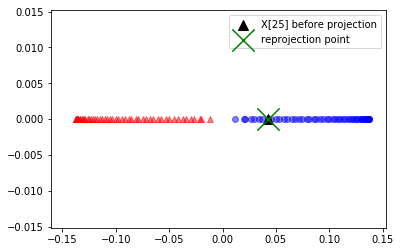

In [37]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),
            color='red', marker='^', alpha=.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=.5)
plt.scatter(x_proj, 0, color='black',
            label='X[25] before projection',
            marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', 
            label='reprojection point',
            marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

In [38]:
from sklearn.decomposition import KernelPCA

In [39]:
X, y = make_moons(n_samples=100, random_state=11)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skerpca = scikit_kpca.fit_transform(X)

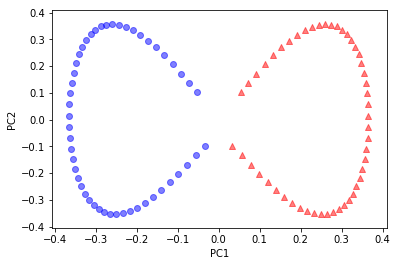

In [41]:
plt.scatter(X_skerpca[y==0, 0], X_skerpca[y==0, 1],
            color='red', marker='^', alpha=.5)
plt.scatter(X_skerpca[y==1, 0], X_skerpca[y==1, 1],
            color='blue', marker='o', alpha=.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()